# PyCoMo Basics #
PyCoMo is a **Py**thon **Co**mmunity metabolic **Mo**delling package. In this tutorial, the core features will be presented.

The expected runtime for this notebook is approximately 5 minutes.
## Setting up PyCoMo ##
Clone the package from github. Next, we are going to import all the packages we need in this tutorial.

In [1]:
from pathlib import Path
import sys
import cobra
import os

### Importing PyCoMo ###
As PyCoMo is currently only available as a local package, the direct path to the package directory needs to be used on import.

In [2]:
path_root = "../pycomo"  # Change path according to your PyCoMo location
sys.path.append(str(path_root))
import pycomo as pycomo

Now we will check if PyCoMo was loaded correctly. For this, we will run the help function on the PyCoMo package.

In [ ]:
help(pycomo)

## Creating a Community Model ##
The creation of a community model consists of 3 steps:
1. Loading the member models
2. Preparing the member models for merging
3. Creating a community model
### Loading the member models ###
The community model creation process starts with models of the individual members. Note that the quality of the community model heavily depends on the quality of the member models!

In this tutorial we are using metabolic models from the AGORA collection. The models were retrieved from www.vmh.life, and are stored in the data folder of the repository. The selection of models and the resulting community represents a cystic fibrosis airway community, as done by Henson et al. (www.doi.org/10.1128/mSystems.00026-19)

In [4]:
test_model_dir = "../data/use_case/henson"
named_models = pycomo.load_named_models_from_dir(test_model_dir)

The models and file names were extracted and stored in named_models. Let's check the contents:

In [5]:
named_models

{'Achromobacter_xylosoxidans_NBRC_15126': <Model Achromobacter_xylosoxidans_NBRC_15126 at 0x2078b2840d0>,
 'Actinomyces_naeslundii_str_Howell_279': <Model Actinomyces_naeslundii_str_Howell_279 at 0x207941cad30>,
 'Burkholderia_cepacia_GG4': <Model Burkholderia_cepacia_GG4 at 0x20794939970>,
 'Escherichia_coli_str_K_12_substr_MG1655': <Model Escherichia_coli_str_K_12_substr_MG1655 at 0x207967ee670>,
 'Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586': <Model Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586 at 0x207985f3430>,
 'Gemella_haemolysans_ATCC_10379': <Model Gemella_haemolysans_ATCC_10379 at 0x20798a47670>,
 'Granulicatella_adiacens_ATCC_49175': <Model Granulicatella_adiacens_ATCC_49175 at 0x207990a80d0>,
 'Haemophilus_influenzae_R2846': <Model Haemophilus_influenzae_R2846 at 0x2079889e250>,
 'Neisseria_flavescens_SK114': <Model Neisseria_flavescens_SK114 at 0x20799fd66d0>,
 'Porphyromonas_endodontalis_ATCC_35406': <Model Porphyromonas_endodontalis_ATCC_35406 at 0x2079a7de31

### Preparing the models for merging ###
With the models loaded, the next step is preparing them for merging. This is done by creating SingleOrganismModel objects. Using them, the models will be formatted for compliance with the SBML format. Further, an exchange compartment will be generated under the name _exchg_.

One of the requirements for a community metabolic model is a common biomass function. To construct it, PyCoMo requires the biomass of each member represented as a single metabolite. This biomass metabolite ID can be specified when constructing the SingleOrganismModel objects. However, it can also be found or generated automatically, by setting the biomass reaction as the objective of the model. Let's check if the biomass function is the objective in all the models

In [6]:
for model in named_models.values():
    print(model.objective)

Maximize
1.0*biomass489 - 1.0*biomass489_reverse_62d1a
Maximize
1.0*biomass492 - 1.0*biomass492_reverse_bc961
Maximize
1.0*biomass479 - 1.0*biomass479_reverse_1d1b2
Maximize
1.0*biomass525 - 1.0*biomass525_reverse_5c178
Maximize
1.0*biomass237 - 1.0*biomass237_reverse_f032e
Maximize
1.0*biomass027 - 1.0*biomass027_reverse_af8dc
Maximize
1.0*biomass091 - 1.0*biomass091_reverse_7b6db
Maximize
1.0*biomass252 - 1.0*biomass252_reverse_f6948
Maximize
1.0*biomass339 - 1.0*biomass339_reverse_45ed6
Maximize
1.0*biomass326 - 1.0*biomass326_reverse_02060
Maximize
1.0*biomass276 - 1.0*biomass276_reverse_7f92e
Maximize
1.0*biomass345 - 1.0*biomass345_reverse_e128f
Maximize
1.0*biomass525 - 1.0*biomass525_reverse_5c178
Maximize
1.0*biomass429 - 1.0*biomass429_reverse_9caa0
Maximize
1.0*biomass042 - 1.0*biomass042_reverse_2a02b
Maximize
1.0*biomass164 - 1.0*biomass164_reverse_ca493
Maximize
1.0*biomass116 - 1.0*biomass116_reverse_02324


With the objective being the biomass function in all models, the biomass metabolite does not need to be specified.

In [7]:
single_org_models = []
for name, model in named_models.items():
    print(name)
    single_org_model = pycomo.SingleOrganismModel(model, name)
    single_org_models.append(single_org_model)

Achromobacter_xylosoxidans_NBRC_15126
Actinomyces_naeslundii_str_Howell_279
Burkholderia_cepacia_GG4
Escherichia_coli_str_K_12_substr_MG1655
Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586
Gemella_haemolysans_ATCC_10379
Granulicatella_adiacens_ATCC_49175
Haemophilus_influenzae_R2846
Neisseria_flavescens_SK114
Porphyromonas_endodontalis_ATCC_35406
Prevotella_melaninogenica_ATCC_25845
Pseudomonas_aeruginosa_NCGM2_S1
Ralstonia_sp_5_7_47FAA
Rothia_mucilaginosa_DY_18
Staphylococcus_aureus_subsp_aureus_USA300_FPR3757
Streptococcus_sanguinis_SK36
Veillonella_atypica_ACS_049_V_Sch6


### Creating a community model ###
With the member models prepared, the community model can be generated. The first step is to create a CommunityModel objects from the member models. The matching of the exchange metabolites can be achieved in two ways: matching via identical metabolite IDs, or via annotation fields. In this tutorial and as all the models come from the same source, matching via identical metabolite IDs will be used.

In [8]:
community_name = "henson_community_model"
com_model_obj = pycomo.CommunityModel(single_org_models, community_name)

The cobra model of the community will generated the first time it is needed. We can enforce this now, by calling it via .community_model

In [9]:
com_model_obj.community_model

No constrained community model set yet. Using the unconstrained model instead.
No unconstrained community model generated yet. Generating now:
Note: no products in the objective function, adding biomass to it.
Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_exchg' since it already exists.
Ignoring reaction 'EX_alltn_exchg' since it already exists.
Ignoring reaction 'EX_arab_L_exchg' since it already exists.
Ignoring reaction 'EX_arbt_exchg' since it already exists.
Ignoring reaction 'EX_arg_L_exchg' since it already exists.
Ignoring reaction 'EX_asn_L_exchg' s

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2hyoxplac_exchg' since it already exists.
Ignoring reaction 'EX__34dhpha_exchg' since it already exists.
Ignoring reaction 'EX__34dhphe_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX__5htrp_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_Lkynr_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acac_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.


Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_exchg' since it already exists.
Ignoring reaction 'EX_alltn_exchg' since it already exists.
Ignoring reaction 'EX_arab_D_exchg' since it already exists.
Ignoring reaction 'EX_arab_L_exchg' since it already exists.
Ignoring reaction 'EX_arbt_exchg' since it already exists.
Ignoring reaction 'EX_arg_L_exchg' since it already exists.
Ignoring reaction 'EX_asn_L_exchg' since it already exists.
Ignoring reaction 'EX_asp_L_exchg' since it already exists.
Ignoring reaction 'EX_bhb_exchg'

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__12ppd_S_exchg' since it already exists.


Ignoring reaction 'EX__15dap_exchg' since it already exists.
Ignoring reaction 'EX__2ddglcn_exchg' since it already exists.
Ignoring reaction 'EX__3hpppn_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_adn_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' sin

Ignoring reaction 'EX_pydxn_exchg' since it already exists.
Ignoring reaction 'EX_rib_D_exchg' since it already exists.
Ignoring reaction 'EX_salcn_exchg' since it already exists.
Ignoring reaction 'EX_sbt_D_exchg' since it already exists.
Ignoring reaction 'EX_ser_D_exchg' since it already exists.
Ignoring reaction 'EX_ser_L_exchg' since it already exists.
Ignoring reaction 'EX_so4_exchg' since it already exists.
Ignoring reaction 'EX_spmd_exchg' since it already exists.
Ignoring reaction 'EX_succ_exchg' since it already exists.
Ignoring reaction 'EX_sucr_exchg' since it already exists.
Ignoring reaction 'EX_sulfac_exchg' since it already exists.
Ignoring reaction 'EX_taur_exchg' since it already exists.
Ignoring reaction 'EX_thm_exchg' since it already exists.
Ignoring reaction 'EX_thr_L_exchg' since it already exists.
Ignoring reaction 'EX_thymd_exchg' since it already exists.
Ignoring reaction 'EX_tma_exchg' since it already exists.
Ignoring reaction 'EX_tmao_exchg' since it alread

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__15dap_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acac_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_exchg' since it already exists.
Ignoring reaction 'EX_arbt_exchg

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__34dhphe_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX__5htrp_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_ex

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__12dgr180_exchg' since it already exists.
Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2ddglcn_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__34dhphe_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX__5htrp_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_acnam_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_e

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__34dhphe_exchg' since it already exists.
Ignoring reaction 'EX__5htrp_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_adn_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg'

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_adn_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_exchg' since it already exists.
Ignoring reaction 'EX_amp_exchg' 

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_adn_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_arg_L_exchg' since it already exists.
Ignoring reaction 'EX_asp_L_exchg' since it already exists.
Ignoring reaction 'EX_ca2_exchg' since it already exists.
Ignoring reaction 'EX_cbl1_exchg' since it already exists.
Ignoring reaction 'EX_cbl2_exchg' since it already exists.
Ignoring reaction 'EX_cd2_exchg' since it already exists.
Ignoring reaction 'EX_cgly_exchg' since it alr

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__15dap_exchg' since it already exists.
Ignoring reaction 'EX__2hyoxplac_exchg' since it already exists.
Ignoring reaction 'EX__34dhpha_exchg' since it already exists.
Ignoring reaction 'EX__3hphac_exchg' since it already exists.
Ignoring reaction 'EX__4hphac_exchg' since it already exists.
Ignoring reaction 'EX__5mta_exchg' since it already exists.
Ignoring reaction 'EX_HC00319_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_Lkynr_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp

Ignoring reaction 'EX_ptrc_exchg' since it already exists.
Ignoring reaction 'EX_pydam_exchg' since it already exists.
Ignoring reaction 'EX_pydx_exchg' since it already exists.
Ignoring reaction 'EX_pydxn_exchg' since it already exists.
Ignoring reaction 'EX_pyr_exchg' since it already exists.
Ignoring reaction 'EX_rib_D_exchg' since it already exists.
Ignoring reaction 'EX_salcn_exchg' since it already exists.
Ignoring reaction 'EX_sbt_D_exchg' since it already exists.
Ignoring reaction 'EX_ser_D_exchg' since it already exists.
Ignoring reaction 'EX_ser_L_exchg' since it already exists.
Ignoring reaction 'EX_so4_exchg' since it already exists.
Ignoring reaction 'EX_spmd_exchg' since it already exists.
Ignoring reaction 'EX_succ_exchg' since it already exists.
Ignoring reaction 'EX_sucr_exchg' since it already exists.
Ignoring reaction 'EX_sulfac_exchg' since it already exists.
Ignoring reaction 'EX_taur_exchg' since it already exists.
Ignoring reaction 'EX_thm_exchg' since it already

Ignoring reaction 'EX_urea_exchg' since it already exists.
Ignoring reaction 'EX_val_L_exchg' since it already exists.
Ignoring reaction 'EX_xan_exchg' since it already exists.
Ignoring reaction 'EX_zn2_exchg' since it already exists.


Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__2hyoxplac_exchg' since it already exists.
Ignoring reaction 'EX__34dhpha_exchg' since it already exists.
Ignoring reaction 'EX_HC00319_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_Lkynr_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exchg' since it already exists.
Ignoring reaction 'EX_alathr_exchg' since it already exists.
Ignoring reaction 'EX_alltn

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' since it already exists.
Ignoring reaction 'EX_alaleu_exc

Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__12dgr180_exchg' since it already exists.
Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_acnam_exchg' since it already exists.
Ignoring reaction 'EX_actn_R_exchg' since it already exists.
Ignoring reaction 'EX_adn_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' s

Ignoring reaction 'EX_ura_exchg' since it already exists.
Ignoring reaction 'EX_urea_exchg' since it already exists.
Ignoring reaction 'EX_uri_exchg' since it already exists.
Ignoring reaction 'EX_val_L_exchg' since it already exists.
Ignoring reaction 'EX_xan_exchg' since it already exists.
Ignoring reaction 'EX_zn2_exchg' since it already exists.


Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__12dgr180_exchg' since it already exists.
Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__2dmmq8_exchg' since it already exists.
Ignoring reaction 'EX__2obut_exchg' since it already exists.
Ignoring reaction 'EX__34dhphe_exchg' since it already exists.
Ignoring reaction 'EX__5htrp_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_acnam_exchg' since it already exists.
Ignoring reaction 'EX_ade_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagl

Ignoring reaction 'EX_zn2_exchg' since it already exists.


Note: no products in the objective function, adding biomass to it.


Ignoring reaction 'EX__26dap_M_exchg' since it already exists.
Ignoring reaction 'EX__3mop_exchg' since it already exists.
Ignoring reaction 'EX__4abz_exchg' since it already exists.
Ignoring reaction 'EX__4hbz_exchg' since it already exists.
Ignoring reaction 'EX_Lcyst_exchg' since it already exists.
Ignoring reaction 'EX_ac_exchg' since it already exists.
Ignoring reaction 'EX_acald_exchg' since it already exists.
Ignoring reaction 'EX_acgam_exchg' since it already exists.
Ignoring reaction 'EX_adocbl_exchg' since it already exists.
Ignoring reaction 'EX_akg_exchg' since it already exists.
Ignoring reaction 'EX_ala_D_exchg' since it already exists.
Ignoring reaction 'EX_ala_L_exchg' since it already exists.
Ignoring reaction 'EX_alaasp_exchg' since it already exists.
Ignoring reaction 'EX_alagln_exchg' since it already exists.
Ignoring reaction 'EX_alaglu_exchg' since it already exists.
Ignoring reaction 'EX_alagly_exchg' since it already exists.
Ignoring reaction 'EX_alahis_exchg' s

No constrained community model set yet. Using the unconstrained model instead.
Generated unconstrained community model.


Name,henson_community_model
Memory address,0x02079ea11400
Number of metabolites,19690
Number of reactions,23185
Number of groups,80
Objective expression,1.0*community_biomass - 1.0*community_biomass_reverse_44dc1
Compartments,"Achromobacter_xylosoxidans_NBRC_15126_c, Achromobacter_xylosoxidans_NBRC_15126_e, Achromobacter_xylosoxidans_NBRC_15126_exchg, exchg, Actinomyces_naeslundii_str_Howell_279_c, Actinomyces_naeslundii_str_Howell_279_e, Actinomyces_naeslundii_str_Howell_279_exchg, Burkholderia_cepacia_GG4_e, Burkholderia_cepacia_GG4_c, Burkholderia_cepacia_GG4_exchg, Escherichia_coli_str_K_12_substr_MG1655_e, Escherichia_coli_str_K_12_substr_MG1655_c, Escherichia_coli_str_K_12_substr_MG1655_exchg, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_c, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_e, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_exchg, Gemella_haemolysans_ATCC_10379_c, Gemella_haemolysans_ATCC_10379_e, Gemella_haemolysans_ATCC_10379_exchg, Granulicatella_adiacens_ATCC_49175_e, Granulicatella_adiacens_ATCC_49175_c, Granulicatella_adiacens_ATCC_49175_exchg, Haemophilus_influenzae_R2846_c, Haemophilus_influenzae_R2846_e, Haemophilus_influenzae_R2846_exchg, Neisseria_flavescens_SK114_c, Neisseria_flavescens_SK114_e, Neisseria_flavescens_SK114_exchg, Porphyromonas_endodontalis_ATCC_35406_c, Porphyromonas_endodontalis_ATCC_35406_e, Porphyromonas_endodontalis_ATCC_35406_exchg, Prevotella_melaninogenica_ATCC_25845_c, Prevotella_melaninogenica_ATCC_25845_e, Prevotella_melaninogenica_ATCC_25845_exchg, Pseudomonas_aeruginosa_NCGM2_S1_c, Pseudomonas_aeruginosa_NCGM2_S1_e, Pseudomonas_aeruginosa_NCGM2_S1_exchg, Ralstonia_sp_5_7_47FAA_c, Ralstonia_sp_5_7_47FAA_e, Ralstonia_sp_5_7_47FAA_exchg, Rothia_mucilaginosa_DY_18_c, Rothia_mucilaginosa_DY_18_e, Rothia_mucilaginosa_DY_18_exchg, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_e, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_c, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_exchg, Streptococcus_sanguinis_SK36_e, Streptococcus_sanguinis_SK36_c, Streptococcus_sanguinis_SK36_exchg, Veillonella_atypica_ACS_049_V_Sch6_c, Veillonella_atypica_ACS_049_V_Sch6_e, Veillonella_atypica_ACS_049_V_Sch6_exchg"


The output of the community model creation contains quite some lines of info and warnings. This is to be expected. Let's have a look at the different types of info:
1. _Ignoring reaction 'EX_4abz_exchg' since it already exists._ This line will come up if a reaction is present in two different community member models under the same ID. This will only happen for exchange reactions in the exchange compartment and are therefor correct behaviour.
2. _WARNING: no annotation overlap found for matching metabolite mn2. Please make sure that the metabolite with this ID is indeed representing the same substance in all models!_ This warning comes up if exchange metabolites do not contain any matching annotation field. This can be an indicator that metabolites with the same ID are merged, but they represent different chemicals. Another common cause is that no annotation was given for this metabolite in one of the models.
3. _WARNING: matching of the metabolite CO2_EX is unbalanced (mass and/or charge). Please manually curate this metabolite for a mass and charge balanced model!_ This warning means that the formula of an exchange metabolite was different between member models. This can be due to the formula being omitted in some of the models. The other reason is that the metabolites differ in their mass or charge. As this would lead to generation or loss of matter from nothing, these issues need to be resolved for a consistent metabolic model.

### Setting the community member composition ###
For the bounds of the model and the normalisation to be correct, the fractions of all community members must be set (and sum up to 1.0). A quick way to do this is to set the abundance fractions equal for all community members.

In [10]:
com_model_obj.equal_abundance()

Name,henson_community_model
Memory address,0x02079ea11a60
Number of metabolites,19690
Number of reactions,23185
Number of groups,80
Objective expression,1.0*community_biomass - 1.0*community_biomass_reverse_44dc1
Compartments,"Achromobacter_xylosoxidans_NBRC_15126_c, Achromobacter_xylosoxidans_NBRC_15126_e, Achromobacter_xylosoxidans_NBRC_15126_exchg, exchg, Actinomyces_naeslundii_str_Howell_279_c, Actinomyces_naeslundii_str_Howell_279_e, Actinomyces_naeslundii_str_Howell_279_exchg, Burkholderia_cepacia_GG4_e, Burkholderia_cepacia_GG4_c, Burkholderia_cepacia_GG4_exchg, Escherichia_coli_str_K_12_substr_MG1655_e, Escherichia_coli_str_K_12_substr_MG1655_c, Escherichia_coli_str_K_12_substr_MG1655_exchg, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_c, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_e, Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_exchg, Gemella_haemolysans_ATCC_10379_c, Gemella_haemolysans_ATCC_10379_e, Gemella_haemolysans_ATCC_10379_exchg, Granulicatella_adiacens_ATCC_49175_e, Granulicatella_adiacens_ATCC_49175_c, Granulicatella_adiacens_ATCC_49175_exchg, Haemophilus_influenzae_R2846_c, Haemophilus_influenzae_R2846_e, Haemophilus_influenzae_R2846_exchg, Neisseria_flavescens_SK114_c, Neisseria_flavescens_SK114_e, Neisseria_flavescens_SK114_exchg, Porphyromonas_endodontalis_ATCC_35406_c, Porphyromonas_endodontalis_ATCC_35406_e, Porphyromonas_endodontalis_ATCC_35406_exchg, Prevotella_melaninogenica_ATCC_25845_c, Prevotella_melaninogenica_ATCC_25845_e, Prevotella_melaninogenica_ATCC_25845_exchg, Pseudomonas_aeruginosa_NCGM2_S1_c, Pseudomonas_aeruginosa_NCGM2_S1_e, Pseudomonas_aeruginosa_NCGM2_S1_exchg, Ralstonia_sp_5_7_47FAA_c, Ralstonia_sp_5_7_47FAA_e, Ralstonia_sp_5_7_47FAA_exchg, Rothia_mucilaginosa_DY_18_c, Rothia_mucilaginosa_DY_18_e, Rothia_mucilaginosa_DY_18_exchg, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_e, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_c, Staphylococcus_aureus_subsp_aureus_USA300_FPR3757_exchg, Streptococcus_sanguinis_SK36_e, Streptococcus_sanguinis_SK36_c, Streptococcus_sanguinis_SK36_exchg, Veillonella_atypica_ACS_049_V_Sch6_c, Veillonella_atypica_ACS_049_V_Sch6_e, Veillonella_atypica_ACS_049_V_Sch6_exchg"


Now let us check if the biomass function was updated accordingly as well

In [11]:
com_model_obj.community_model.reactions.get_by_id("community_biomass").reaction

'0.058823529411764705 Achromobacter_xylosoxidans_NBRC_15126_cpd11416_Achromobacter_xylosoxidans_NBRC_15126_exchg + 0.058823529411764705 Actinomyces_naeslundii_str_Howell_279_cpd11416_Actinomyces_naeslundii_str_Howell_279_exchg + 0.058823529411764705 Burkholderia_cepacia_GG4_cpd11416_Burkholderia_cepacia_GG4_exchg + 0.058823529411764705 Escherichia_coli_str_K_12_substr_MG1655_cpd11416_Escherichia_coli_str_K_12_substr_MG1655_exchg + 0.058823529411764705 Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_cpd11416_Fusobacterium_nucleatum_subsp_nucleatum_ATCC_25586_exchg + 0.058823529411764705 Gemella_haemolysans_ATCC_10379_cpd11416_Gemella_haemolysans_ATCC_10379_exchg + 0.058823529411764705 Granulicatella_adiacens_ATCC_49175_cpd11416_Granulicatella_adiacens_ATCC_49175_exchg + 0.058823529411764705 Haemophilus_influenzae_R2846_cpd11416_Haemophilus_influenzae_R2846_exchg + 0.058823529411764705 Neisseria_flavescens_SK114_cpd11416_Neisseria_flavescens_SK114_exchg + 0.058823529411764705 Porphyro

As can be seen above, the biomass function now takes an equal amount of all 17 community members, 1/17th or 0.0588...

### Quality Checks ###
One of the quality checks that should be done is to look into all unbalanced reactions (mass and charge) in the entire model. As said before, such reactions should only exist in the case of boundary reactions, such as exchange, sink and source reactions.

In [12]:
com_model_obj.get_unbalanced_reactions()

{<Reaction Achromobacter_xylosoxidans_NBRC_15126_DM_5DRIB_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207b787bfa0>: {'C': -5.0,
  'H': -10.0,
  'O': -4.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_DM_5MTR_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207b7876100>: {'C': -6.0,
  'H': -12.0,
  'O': -4.0,
  'S': -1.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_DM_dhptd_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207b78766a0>: {'C': -5.0,
  'H': -8.0,
  'O': -4.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_DM_hcys_L_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207b7876760>: {'C': -4.0,
  'H': -9.0,
  'N': -1.0,
  'O': -2.0,
  'S': -1.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_EX_biomass_e_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207b9b99ac0>: {'X': -1.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_dreplication_Achromobacter_xylosoxidans_NBRC_15126_c at 0x207baa4c6d0>: {'X': 1.0},
 <Reaction Achromobacter_xylosoxidans_NBRC_15126_pbiosynthesis_Achro

## Saving and loading community models ##
Community model objects can be saved and loaded into SBML files. This is different from the other available option to save the cobra model of the community model objects, as the abundance fractions of the organisms are written into the file as well. Saving and loading the community model can be done like this:

In [13]:
com_model_obj.save("../data/toy/output/henson_com_model.xml")

In [14]:
com_model_obj_loaded = pycomo.CommunityModel.load("../data/toy/output/henson_com_model.xml")

In [15]:
com_model_obj_loaded.community_model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Achromobacter_xylosoxidans_NBRC_15126_dnarep_Achromobacter_xylosoxidans_NBRC_15126_c,Achromobacter_xylosoxidans_NBRC_15126_dreplication_Achromobacter_xylosoxidans_NBRC_15126_c,2.579,0,0.00%
Achromobacter_xylosoxidans_NBRC_15126_proteinsynth_Achromobacter_xylosoxidans_NBRC_15126_c,Achromobacter_xylosoxidans_NBRC_15126_pbiosynthesis_Achromobacter_xylosoxidans_NBRC_15126_c,2.579,0,0.00%
Achromobacter_xylosoxidans_NBRC_15126_rnatrans_Achromobacter_xylosoxidans_NBRC_15126_c,Achromobacter_xylosoxidans_NBRC_15126_rtranscription_Achromobacter_xylosoxidans_NBRC_15126_c,2.579,0,0.00%
Actinomyces_naeslundii_str_Howell_279_dnarep_Actinomyces_naeslundii_str_Howell_279_c,Actinomyces_naeslundii_str_Howell_279_dreplication_Actinomyces_naeslundii_str_Howell_279_c,2.579,0,0.00%
Actinomyces_naeslundii_str_Howell_279_proteinsynth_Actinomyces_naeslundii_str_Howell_279_c,Actinomyces_naeslundii_str_Howell_279_pbiosynthesis_Actinomyces_naeslundii_str_Howell_279_c,2.579,0,0.00%
Actinomyces_naeslundii_str_Howell_279_rnatrans_Actinomyces_naeslundii_str_Howell_279_c,Actinomyces_naeslundii_str_Howell_279_rtranscription_Actinomyces_naeslundii_str_Howell_279_c,2.579,0,0.00%
Burkholderia_cepacia_GG4_dnarep_Burkholderia_cepacia_GG4_c,Burkholderia_cepacia_GG4_dreplication_Burkholderia_cepacia_GG4_c,2.579,0,0.00%
Burkholderia_cepacia_GG4_proteinsynth_Burkholderia_cepacia_GG4_c,Burkholderia_cepacia_GG4_pbiosynthesis_Burkholderia_cepacia_GG4_c,2.579,0,0.00%
Burkholderia_cepacia_GG4_rnatrans_Burkholderia_cepacia_GG4_c,Burkholderia_cepacia_GG4_rtranscription_Burkholderia_cepacia_GG4_c,2.579,0,0.00%
_12dgr180_exchg,EX__12dgr180_exchg,0.3429,39,0.19%


## Analysis of community models ##
PyCoMo offers the option to calculate all potential exchange metabolites and cross-feeding interactions in a community, independent of the community composition. The example for this part will be a three member community published by Koch et al. 2019 (https://doi.org/10.1371/journal.pcbi.1006759). The three member organisms are representatives of functional guilds in a biogas community.
### Creating the community model ###
We repeat the steps as before.

In [16]:
test_model_dir = "../data/use_case/koch"
named_models = pycomo.load_named_models_from_dir(test_model_dir)

'3PG' is not a valid SBML 'SId'.
'2PG' is not a valid SBML 'SId'.
Adding exchange reaction EX_H2_EX with default bounds for boundary metabolite: H2_EX.
Adding exchange reaction EX_Ac_EX with default bounds for boundary metabolite: Ac_EX.
Adding exchange reaction EX_CO2_EX with default bounds for boundary metabolite: CO2_EX.
Adding exchange reaction EX_Form_EX with default bounds for boundary metabolite: Form_EX.
Adding exchange reaction EX_SO4_EX with default bounds for boundary metabolite: SO4_EX.
Adding exchange reaction EX_H2S_EX with default bounds for boundary metabolite: H2S_EX.
Adding exchange reaction EX_Eth_EX with default bounds for boundary metabolite: Eth_EX.
Adding exchange reaction EX_Lac_EX with default bounds for boundary metabolite: Lac_EX.
Adding exchange reaction EX_Pyr_EX with default bounds for boundary metabolite: Pyr_EX.
Adding exchange reaction EX_BM_tot with default bounds for boundary metabolite: BM_tot.
'2PG__PEP' is not a valid SBML 'SId'.
'3PG__2PG' is not 

In [17]:
named_models

{'dv': <Model CNA_DV at 0x208408cf8b0>,
 'mb': <Model CNA_MB at 0x20840929ca0>,
 'mh': <Model CNA_MM at 0x20842866f40>}

In [18]:
single_org_models = []
for name, model in named_models.items():
    single_org_model = pycomo.SingleOrganismModel(model, name)
    single_org_models.append(single_org_model)
    
community_name = "koch_community_model"
com_model_obj = pycomo.CommunityModel(single_org_models, community_name)

With the community model generated, we set the medium for the analysis, as done by Koch et al.

In [19]:
medium = {
    'EX_CO2_EX_exchg': 1000.0,
    'EX_Eth_EX_exchg': 1000.0,
    'EX_BM_tot_exchg': 1000.0
}
com_model_obj.medium = medium
com_model_obj.apply_medium()

# Some metabolites are not allowed to accumulate in the medium.
com_model_obj.community_model.reactions.get_by_id("EX_Form_EX_exchg").upper_bound = 0.
com_model_obj.community_model.reactions.get_by_id("EX_H2_EX_exchg").upper_bound = 0.

No constrained community model set yet. Using the unconstrained model instead.
No unconstrained community model generated yet. Generating now:


Ignoring reaction 'EX_H2_EX_exchg' since it already exists.
Ignoring reaction 'EX_CO2_EX_exchg' since it already exists.
Ignoring reaction 'EX_Ac_EX_exchg' since it already exists.


Ignoring reaction 'EX_H2_EX_exchg' since it already exists.
Ignoring reaction 'EX_CO2_EX_exchg' since it already exists.
Ignoring reaction 'EX_CH4_EX_exchg' since it already exists.
Ignoring reaction 'EX_Form_EX_exchg' since it already exists.
Ignoring reaction 'EX_BM_tot_exchg' since it already exists.


No constrained community model set yet. Using the unconstrained model instead.
Generated unconstrained community model.


### Calculating potential metabolite exchange ###
All potential exchange metabolite fluxes and cross-feeding interactions can be calculated with the _potential_metabolite_exchanges_ method. This is a single FVA, but with a minimum objective of 0 and relaxed constraints. All reaction constraints are changed to include the value 0, which circumvents cases where a specific flux through a reaction is required, leading to infeasible solutions for certain community compositions.

In [20]:
com_model_obj.potential_metabolite_exchanges()

,metabolite_id,metabolite_name,cross_feeding,produced_by,consumed_by
0,H2_EX_exchg,H2_external,True,"[dv, mh]","[dv, mb, mh]"
1,Ac_EX_exchg,acetate_external,True,[dv],[mb]
2,CO2_EX_exchg,CO2_external,True,"[mb, mh]","[dv, mb, mh]"
3,Form_EX_exchg,formate_external,True,[dv],[mh]
4,SO4_EX_exchg,sulfate_external,False,[],[]
5,H2S_EX_exchg,hydrogensulfide_external,False,[],[]
6,Eth_EX_exchg,ethanol_external,False,[],[dv]
7,Lac_EX_exchg,lactate_external,False,[],[]
8,Pyr_EX_exchg,pyruvate_external,False,[],[]
9,CH4_EX_exchg,nethane_external,False,"[mb, mh]",[]


### Plotting the maxiumum growth rate over the composition space ###

In [ ]:
import pandas as pd

# Iterate over the fractions in steps of 0.01
rows = []
for i in range (1,100,1):  # fraction of D. vulgaris
    for j in range (1, 100-i, 1): # fraction of M. hungatei
        if (100-i-j) < 0:
            continue

        abundances = {"dv": i/100., "mh": j/100., "mb": (100-i-j)/100.}
        
        # Apply the abuyndances
        com_model_obj.apply_abundance(abundances)
        
        # Reapply the bound restrictions of the exchange reactions
        com_model_obj.community_model.reactions.get_by_id("EX_Form_EX_exchg").upper_bound = 0.
        com_model_obj.community_model.reactions.get_by_id("EX_H2_EX_exchg").upper_bound = 0.
        
        # Calculate the optimal growth rate
        solution = com_model_obj.community_model.optimize()
        growth = 0. if str(solution.status) == "infeasible" else solution.objective_value
        rows.append({"dv": i/100., "mh": j/100., "growth": growth})
        
growth_df = pd.DataFrame(rows)

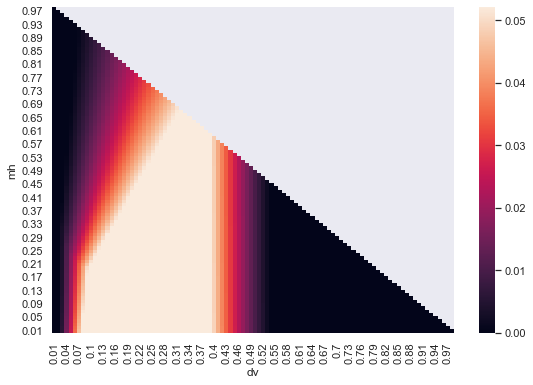

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Restructure dataframe for heatmap
growth_df_pivot = growth_df.pivot("mh", "dv", "growth")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(growth_df_pivot, ax=ax)
ax.invert_yaxis()